In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/Download.zip",'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              run_eagerly=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='sparse',
        classes=['cats', 'dogs'])  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/data/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='sparse')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
# Check training class indices
train_class_indices = train_generator.class_indices
print("Training Class Indices:", train_class_indices)

# Check validation class indices
validation_class_indices = validation_generator.class_indices
print("Validation Class Indices:", validation_class_indices)


Training Class Indices: {'cats': 0, 'dogs': 1}
Validation Class Indices: {'cats': 0, 'dogs': 1}


In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        )
model.save_weights('first_try.h5')

<ipython-input-8-6e19f8846f2e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
125/125 [==============================] - 100s 792ms/step - loss: 0.7159 - accuracy: 0.5140 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
125/125 [==============================] - 111s 890ms/step - loss: 0.6915 - accuracy: 0.5180 - val_loss: 0.6885 - val_accuracy: 0.5725
Epoch 3/20
125/125 [==============================] - 97s 774ms/step - loss: 0.6868 - accuracy: 0.5330 - val_loss: 0.6837 - val_accuracy: 0.6100
Epoch 4/20
125/125 [==============================] - 95s 761ms/step - loss: 0.6739 - accuracy: 0.5895 - val_loss: 0.6676 - val_accuracy: 0.5800
Epoch 5/20
125/125 [==============================] - 97s 772ms/step - loss: 0.6510 - accuracy: 0.6300 - val_loss: 0.6357 - val_accuracy: 0.6488
Epoch 6/20
125/125 [==============================] - 96s 771ms/step - loss: 0.6489 - accuracy: 0.6290 - val_loss: 0.6349 - val_accuracy: 0.6388
Epoch 7/20
125/125 [==============================] - 96s 771ms/step - loss: 0.6305 - accuracy: 0.6670 - val_loss: 0.5838 - val_

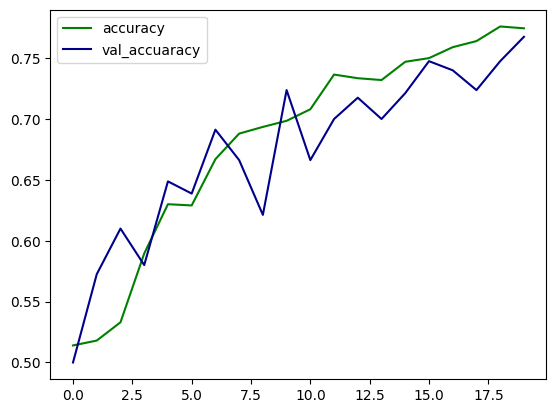

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='darkblue', label='val_accuaracy')
plt.legend()
plt.show()

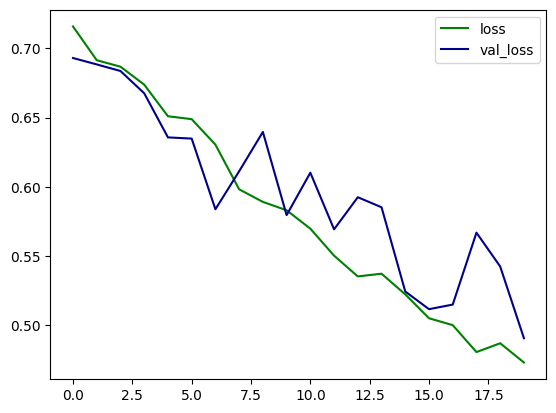

In [ ]:
plt.plot(history.history['loss'], color='green', label='loss')
plt.plot(history.history['val_loss'], color='darkblue', label='val_loss')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

# Load the trained model
model.load_weights('first_try.h5')

# Function to make predictions on a single image
def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the pixel values to between 0 and 1

    prediction = model.predict(img_array)

    if prediction[0][0] > prediction[0][1]:
        print("It's a cat!")
    else:
        print("It's a dog!")

# Example usage:
# Replace 'path/to/your/image.jpg' with the path to the image you want to predict

import os

folder_path = '/content/dogo'

image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

image_paths = [os.path.join(folder_path, f) for f in image_files]

for path in image_paths:
    predict_single_image(path)

1/1 [==============================] - 0s 44ms/step
It's a dog!
1/1 [==============================] - 0s 38ms/step
It's a dog!
1/1 [==============================] - 0s 45ms/step
It's a cat!
1/1 [==============================] - 0s 42ms/step
It's a dog!
1/1 [==============================] - 0s 38ms/step
It's a cat!
1/1 [==============================] - 0s 35ms/step
It's a dog!
1/1 [==============================] - 0s 35ms/step
It's a dog!
1/1 [==============================] - 0s 36ms/step
It's a dog!
1/1 [==============================] - 0s 34ms/step
It's a dog!
1/1 [==============================] - 0s 36ms/step
It's a dog!
1/1 [==============================] - 0s 36ms/step
It's a dog!
1/1 [==============================] - 0s 38ms/step
It's a dog!
1/1 [==============================] - 0s 39ms/step
It's a dog!
1/1 [==============================] - 0s 37ms/step
It's a cat!
1/1 [==============================] - 0s 35ms/step
It's a dog!
1/1 [==============================] - 0

In [ ]:
# Load the trained model
model.load_weights('first_try.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate_generator(validation_generator, steps=len(validation_generator))

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


<ipython-input-12-e9fc63db31b9>:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(validation_generator, steps=len(validation_generator))


Test Accuracy: 76.75%


In [ ]:
import pandas as pd
df = pd.DataFrame()

In [ ]:
from keras.preprocessing import image
import numpy as np

# Load the trained model
model.load_weights('first_try.h5')
# true_pred = []
# false_pred = []
# predicted = []
# image_n = []

# Function to make predictions on a single image
def predict_single_image_with_confidence(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the pixel values to between 0 and 1

    prediction = model.predict(img_array)

    print("Class Probabilities:", prediction[0])
    true_pred.append(prediction[0][0])
    false_pred.append(prediction[0][1])

    if prediction[0][0] > prediction[0][1]:
        predicted.append('cat')
        print("Prediction: It's a cat!")
    else:
        predicted.append('dog')
        print("Prediction: It's a dog!")

# Folder containing cat images
cat_folder_path = '/content/meowth'

# List all files in the folder
import os
cat_image_files = os.listdir(cat_folder_path)

# Make predictions for each cat image
for cat_image_file in cat_image_files:
    cat_image_path = os.path.join(cat_folder_path, cat_image_file)
    image_n.append(cat_image_file)
    print(f"\nPredicting for image: {cat_image_file}")
    predict_single_image_with_confidence(cat_image_path)


Predicting for image: cat.8748.jpg
1/1 [==============================] - 0s 35ms/step
Class Probabilities: [0.8335553  0.16644472]
Prediction: It's a cat!

Predicting for image: cat.8716.jpg
1/1 [==============================] - 0s 38ms/step
Class Probabilities: [0.76149154 0.2385085 ]
Prediction: It's a cat!

Predicting for image: cat.8744.jpg
1/1 [==============================] - 0s 36ms/step
Class Probabilities: [0.40197673 0.59802324]
Prediction: It's a dog!

Predicting for image: cat.8739.jpg
1/1 [==============================] - 0s 36ms/step
Class Probabilities: [0.45633298 0.543667  ]
Prediction: It's a dog!

Predicting for image: cat.8726.jpg
1/1 [==============================] - 0s 36ms/step
Class Probabilities: [0.8652495  0.13475052]
Prediction: It's a cat!

Predicting for image: cat.8711.jpg
1/1 [==============================] - 0s 35ms/step
Class Probabilities: [0.5554962 0.4445038]
Prediction: It's a cat!

Predicting for image: cat.8736.jpg
1/1 [===================

In [ ]:
df['Image_Name'] = image_n
df['Is_cat'] = true_pred
df['Is_dog'] = false_pred
df['Predicted'] = predicted

In [ ]:
df.to_csv('dog-vs-cat-sparse_cat.csv')

In [ ]:
df

,Image_Name,Is_cat,Is_dog,Predicted
0,dog.9236.jpg,0.122202,0.877798,dog
1,dog.9216.jpg,0.061613,0.938387,dog
2,dog.9217.jpg,0.512010,0.487990,cat
3,dog.9222.jpg,0.040526,0.959474,dog
4,dog.9220.jpg,0.559654,0.440346,cat
...,...,...,...,...
75,cat.8717.jpg,0.745982,0.254018,cat
76,cat.8723.jpg,0.562767,0.437233,cat
77,cat.8751.jpg,0.877964,0.122036,cat
78,cat.8756.jpg,0.658214,0.341786,cat
